In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/pratikkayal/PlantDoc-Object-Detection-Dataset.git

Cloning into 'PlantDoc-Object-Detection-Dataset'...
remote: Enumerating objects: 5190, done.
remote: Total 5190 (delta 0), reused 0 (delta 0), pack-reused 5190
Receiving objects: 100% (5190/5190), 941.89 MiB | 46.78 MiB/s, done.
Resolving deltas: 100% (2328/2328), done.
Checking out files: 100% (5199/5199), done.


In [3]:
df_train = pd.read_csv("/content/PlantDoc-Object-Detection-Dataset/train_labels.csv")
df_train.head(3)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,cherry-tree-leaves-and-fruits.jpg,350,300,Cherry leaf,198,77,299,252
1,cherry-tree-leaves-and-fruits.jpg,350,300,Cherry leaf,3,114,148,235
2,cherry-tree-leaves-and-fruits.jpg,350,300,Cherry leaf,30,184,189,297


In [4]:
df_test = pd.read_csv("/content/PlantDoc-Object-Detection-Dataset/test_labels.csv")
df_test.head(3)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Black%20rot%20on%20foliage.jpg,1060,795,grape leaf black rot,1,58,859,732
1,pepper_leaf.jpg,300,400,Bell_pepper leaf,40,58,251,392
2,depositphotos_1323264-Raspberry-leaf-on-white.jpg,1024,772,Raspberry leaf,98,75,964,710


In [5]:
# number of unique images

print(df_train['filename'].nunique())
print(df_test['filename'].nunique())

2345
236


In [6]:
#number of classes
print(df_train['class'].value_counts())

Blueberry leaf                          827
Tomato leaf yellow virus                787
Peach leaf                              610
Raspberry leaf                          539
Strawberry leaf                         462
Tomato Septoria leaf spot               412
Tomato leaf                             369
Corn leaf blight                        360
Potato leaf early blight                316
Bell_pepper leaf                        312
Tomato mold leaf                        277
Tomato leaf bacterial spot              266
Squash Powdery mildew leaf              251
Bell_pepper leaf spot                   249
Soyabean leaf                           246
Potato leaf late blight                 240
Apple leaf                              237
Tomato leaf mosaic virus                225
Cherry leaf                             221
Tomato leaf late blight                 207
grape leaf                              205
Tomato Early blight leaf                195
Apple rust leaf                 

In [7]:
df_test['class'].value_counts()

Tomato leaf yellow virus      42
Tomato leaf mosaic virus      36
Strawberry leaf               30
Tomato leaf                   27
Tomato Septoria leaf spot     24
Blueberry leaf                22
Soyabean leaf                 20
Cherry leaf                   19
Tomato Early blight leaf      19
Raspberry leaf                17
Potato leaf early blight      17
Tomato mold leaf              16
grape leaf                    15
Bell_pepper leaf spot         15
Tomato leaf bacterial spot    14
Tomato leaf late blight       14
Apple Scab Leaf               13
Corn leaf blight              12
Bell_pepper leaf              11
Apple rust leaf               11
Corn rust leaf                10
Peach leaf                    10
Potato leaf late blight       10
Apple leaf                    10
grape leaf black rot           8
Squash Powdery mildew leaf     6
Corn Gray leaf spot            4
Name: class, dtype: int64

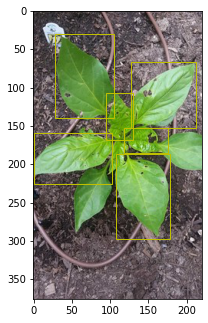

In [8]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('/content/PlantDoc-Object-Detection-Dataset/TRAIN/0.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in df_train[df_train.filename == "0.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
   
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'y', facecolor = 'none')
    
    ax.add_patch(rect)

In [9]:
!git clone https://github.com/tensorflow/models.git


Cloning into 'models'...
remote: Enumerating objects: 57599, done.
remote: Counting objects: 100% (674/674), done.
remote: Compressing objects: 100% (376/376), done.
remote: Total 57599 (delta 394), reused 549 (delta 283), pack-reused 56925
Receiving objects: 100% (57599/57599), 572.90 MiB | 37.58 MiB/s, done.
Resolving deltas: 100% (39768/39768), done.


In [10]:
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/models/research
Processing /content/models/research
     |████████████████████████████████| 9.6MB 35.1MB/s 
     |████████████████████████████████| 358kB 40.0MB/s 
     |████████████████████████████████| 1.1MB 37.8MB/s 
     |████████████████████████████████| 2.3MB 46.4MB/s 
     |████████████████████████████████| 829kB 40.6MB/s 
     |████████████████████████████████| 153kB 55.4MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 1.2MB 38.9MB/s 
     |████████████████████████████████| 174kB 59.2MB/s 
     |████████████████████████████████| 645kB 42.3MB/s 
     |████████████████████████████████| 102kB 16.0MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 686kB 35.9MB/s 
     |████████████████████████████████| 38.2MB 61kB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1648944 sha256=083652e281e9cfaecff41296a5696042bdf04870404595b93c47ef

In [11]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz

--2021-05-16 01:51:14--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.15.80, 2607:f8b0:4004:810::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.15.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353643040 (337M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_resnet1 100%[===================>] 337.26M   171MB/s    in 2.0s    

2021-05-16 01:51:16 (171 MB/s) - ‘faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz’ saved [353643040/353643040]



In [12]:
!tar -xvf faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz

faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/pipeline.config
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/saved_model.pb
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [13]:
%%bash
PIPELINE_CONFIG_PATH='/content/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.config'
MODEL_DIR='/content/model/'
NUM_TRAIN_STEPS=500
SAMPLE_1_OF_N_EVAL_EXAMPLES=1
python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path=${PIPELINE_CONFIG_PATH} \
    --model_dir=${MODEL_DIR} \
    --num_train_steps=${NUM_TRAIN_STEPS} \
    --alsologtostderr

2021-05-16 01:51:27.122060: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-16 01:51:29.805968: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-16 01:51:29.807001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-16 01:51:29.878522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-16 01:51:29.879185: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-16 01:51:29.879238: I tensorflow/stream_executor/platform/default/dso_loade

In [14]:
%%bash
PIPELINE_CONFIG_PATH='/content/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.config'
MODEL_DIR='/content/model/'
python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path=${PIPELINE_CONFIG_PATH} \
    --model_dir=${MODEL_DIR} \
    --checkpoint_dir=${MODEL_DIR}  

creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.31s).
Accumulating evaluation results...
DONE (t=0.46s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.004
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.006
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 

2021-05-16 02:01:14.001971: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
W0516 02:01:16.845764 140088813201280 model_lib_v2.py:1064] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0516 02:01:16.845965 140088813201280 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0516 02:01:16.846053 140088813201280 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0516 02:01:16.846143 140088813201280 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0516 02:01:16.846311 140088813201280 model_lib_v2.py:1085] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-05-16 02:01:16.877980: I tensorflow/compiler/jit/xla

In [16]:
!python3 /content/models/research/object_detection/exporter_main_v2.py \
  --pipeline_config_path /content/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.config \
  --trained_checkpoint_dir /content/model \
  --output_directory /content/exported_model

2021-05-16 03:10:45.611530: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-16 03:10:47.795576: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-16 03:10:47.796413: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-16 03:10:47.824543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-16 03:10:47.825130: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-16 03:10:47.825167: I tensorflow/stream_executor/platform/default/dso_loade